# ML: Supervised algorithm - Linear Regression - Property Prices

## Introduction

We want to estimate the price of houses in certain districts of California (USA) based on the average values of the characteristics of the houses in each district. 

## 1. Import libraries

In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score #coeficiente de determinación

The fetch_california_housing package in sklearn.dataset contains the dataset we will be working with. 

For training our linear regression model we will need the LinearRegression package from sklearn.linear_model. 

Finally, we will import the train_test_split functions from sklearn.model_selection and r2_score from sklearn.metrics.

## 2. Load datasets

Load the dataset. In the following link you can find the details of the function: (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). In addition, we show a short explanation of the dataset with the DESCR attribute.

In [2]:
california_housing = fetch_california_housing(as_frame=True)

# Dataset description
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

The predictor or independent variables include:

* MedInc: average wage in the group of dwellings on the block.
* HouseAge: average age of the dwellings in the block.
* AveRooms: average number of total number of rooms in the house
* AveBedrms: average number of bedrooms 
* Population: total population of the block
* AveOccup: average number of members per house 
* Latitude
* Longitude

## 3. Dataset analysis

Let's quickly visualise the most important details of our data: a small sample of the data using the head command and the variable types with the info command.

In [3]:
dataset = california_housing.frame
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Small descriptive analysis of our variables. We want to understand above all the type of each variable and how it is distributed. For this use describe() method.

In [5]:
california_housing.data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Another way to explore the data is by using visual tools. In this case, we will calculate the histogram of each variable using hist(). See below the different types of distributions, as we could make 4 groups:

* AveRooms, AveBedrms, Population and AveOccup show distributions with long right tails.
* MedInc and MedHouseVal follow a Poisson-like distribution.
* HouseAge follows a Gaussian distribution
* Latitude and Longitude variables are formed by the combination of 2 Gaussian distributions.

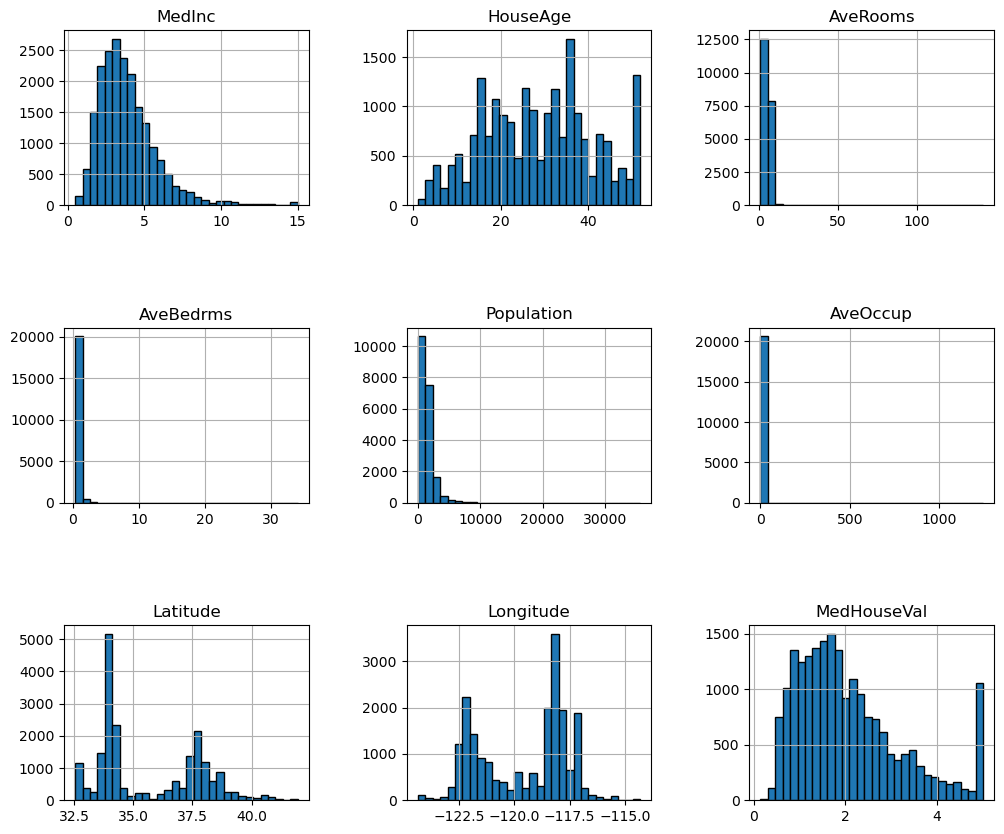

In [6]:
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Another important check we must perform before launching our linear regression model is to verify the linear relationship between each of the variables. Remember that we are mainly interested in the relationship between the dependent variable and the rest of the independent variables. To do this, we will make use of the corr() function that calculates the Pearson correlation.

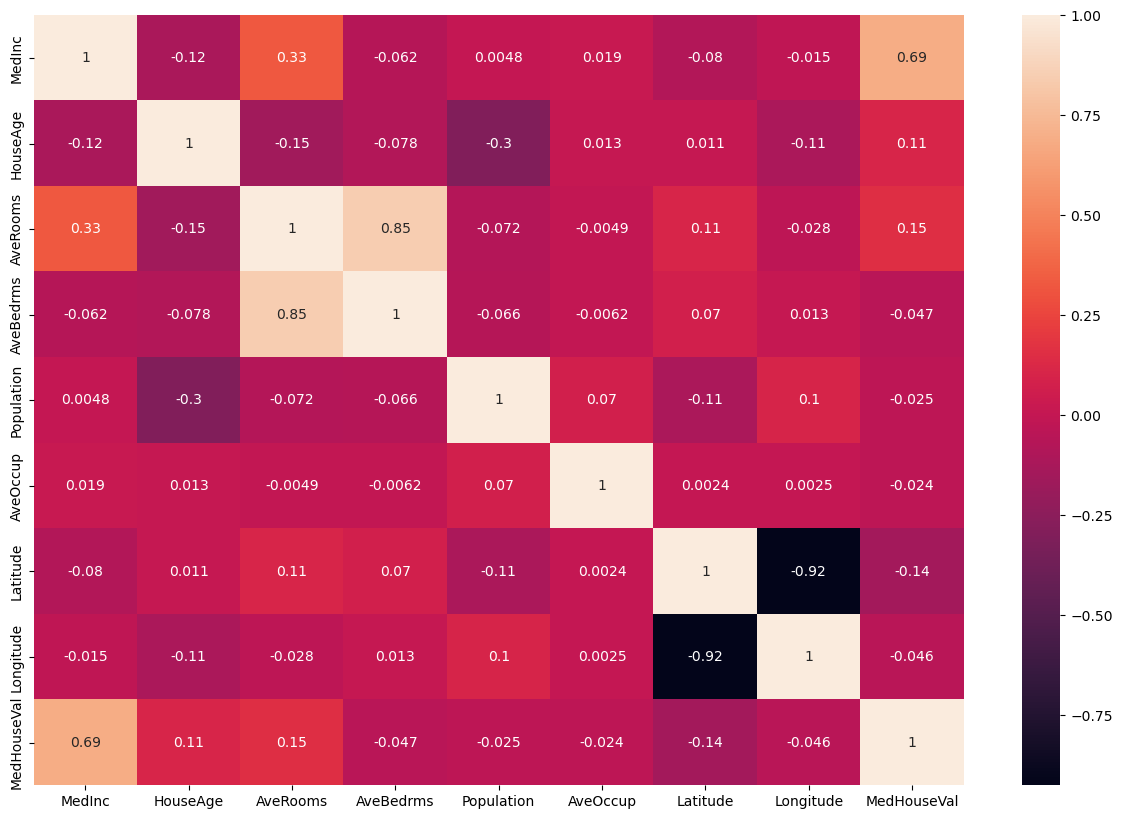

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(california_housing.frame.corr(),annot=True)

From this graph we can observe that the dependent variable MedHouseVal has a higher correlation with mean income (MedInc), which makes sense from a practical point of view. Similarly, we can see that the independent variables AveRooms and AveBedrms have high collinearity.

## 4. Train model

Remove the variable AveBedrms from the dataset. The reason is because of what we commented before, it has a high collinearity with the independent variable AveRooms and also, compared to it, it does not have such a high correlation with our target variable MedHouseVal.
 
We will use a value of 0.8 to define that 80% of the data is used for the train set. When defining this number keep in mind that the higher the number the more data you will have to learn but the less "new" data you will have to generate that test set.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
                                        california_housing.data.drop('AveBedrms', axis = 1),
                                        california_housing.target,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [9]:
modelo = LinearRegression()
modelo.fit(X_train,  y_train)

LinearRegression()

Evaluate the model with the test set. In this particular case, we are interested in obtaining from the model the estimate of the different parameters ßi associated with each of the variables. And on the other hand, we want to check the r^2 or coefficient of determination, which measures the proportion of variance in the dependent variable that can be explained by the independent variables. This is the same as measuring how well the data fit the regression model. 

In [10]:
print("Intercept:", modelo.intercept_)
print("Coeficient:", list(zip(X_train.columns, modelo.coef_.flatten(), )))
print("Determination ratio R^2:", modelo.score(X_test, y_test))

Intercept: -38.413528708612915
Coeficient: [('MedInc', 0.3709116452580135), ('HouseAge', 0.00970715150735077), ('AveRooms', 0.014168961809859796), ('Population', -4.289167755256043e-06), ('AveOccup', -0.003755939128775355), ('Latitude', -0.44958215146948904), ('Longitude', -0.45768658596736567)]
Determination ratio R^2: 0.5945342038911727


r^2 = 0.59. This means that 59% of the variability observed in the target or dependent variable is explained by the regression model we have trained. 

__Please note__: intercept is -38. Be careful so as not to return a meaningless value.